In [1]:
import pandas as pd
import numpy as np

C:\Users\Rajasekar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/Rajasekar/Downloads/Hate Speech Dataset/Annotations_Metadata.csv")
df

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate
10940,33677019_1,735154,1388,0,noHate
10941,33677019_2,735154,1388,0,noHate
10942,33677053_1,572266,1388,0,hate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  object
dtypes: int64(3), object(2)
memory usage: 427.6+ KB


In [4]:
import os
# Specify the path to the folder containing text documents
text_folder_path = r'C:\Users\Rajasekar\Downloads\Hate Speech Dataset\Text file'

# Initialize an empty list to store text data
text_data = []

# Iterate through each file in the text folder
for file_id in df['file_id']:
    # Construct the path to the text file
    text_file_path = os.path.join(text_folder_path, f"{file_id}.txt")

    # Read the text from the file
    with open(text_file_path, 'r', encoding='utf-8') as file:
        text_content = file.read()

    # Append the text content to the list
    text_data.append({'file_id': file_id, 'text_content': text_content})

# Create a DataFrame from the text data list
text_df = pd.DataFrame(text_data)

# Merge the two datasets based on 'file_id'
merged_df = pd.merge(df, text_df, on='file_id', how='inner')

In [5]:
merged_df

,file_id,user_id,subforum_id,num_contexts,label,text_content
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...
...,...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate,"Billy - `` That guy would n't leave me alone ,..."
10940,33677019_1,735154,1388,0,noHate,Wish we at least had a Marine Le Pen to vote f...
10941,33677019_2,735154,1388,0,noHate,Its like the choices are white genocide candid...
10942,33677053_1,572266,1388,0,hate,Why White people used to say that sex was a si...


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  object
 5   text_content  10944 non-null  object
dtypes: int64(3), object(3)
memory usage: 513.1+ KB


In [7]:
merged_df.to_csv('HateNohate.csv', index=False)

In [8]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the dataset
file_path = 'C:/Users/Rajasekar/Downloads/HateNohate.csv'  
df1 = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df1.head())

# Check for missing values
print(df1.isnull().sum())

# Function for text cleaning and preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (you can choose to skip this step if not required)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply the preprocessing function to the 'text' column
df1['processed_text'] = df1['text_content'].apply(preprocess_text)

# Display the updated dataframe
print(df1.head())

      file_id  user_id  subforum_id  num_contexts   label  \
0  12834217_1   572066         1346             0  noHate   
1  12834217_2   572066         1346             0  noHate   
2  12834217_3   572066         1346             0  noHate   
3  12834217_4   572066         1346             0    hate   
4  12834217_5   572066         1346             0  noHate   

                                        text_content  
0  As of March 13th , 2014 , the booklet had been...  
1  In order to help increase the booklets downloa...  
2  ( Simply copy and paste the following text int...  
3  Click below for a FREE download of a colorfull...  
4  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...  
file_id         0
user_id         0
subforum_id     0
num_contexts    0
label           0
text_content    0
dtype: int64
      file_id  user_id  subforum_id  num_contexts   label  \
0  12834217_1   572066         1346             0  noHate   
1  12834217_2   572066         1346             0  noHate   

In [9]:
df1

,file_id,user_id,subforum_id,num_contexts,label,text_content,processed_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",march th booklet download time count
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,order help increas booklet download great stor...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simpli copi past follow text youtub video desc...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click free download color illustr page ebook z...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click download mb green banner link
...,...,...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate,"Billy - `` That guy would n't leave me alone ,...",billi guy nt leav gave trudeau salut
10940,33677019_1,735154,1388,0,noHate,Wish we at least had a Marine Le Pen to vote f...,wish marin le pen vote canada
10941,33677019_2,735154,1388,0,noHate,Its like the choices are white genocide candid...,like choic white genocid candid
10942,33677053_1,572266,1388,0,hate,Why White people used to say that sex was a si...,white peopl use say sex sin use mysteri saw ch...


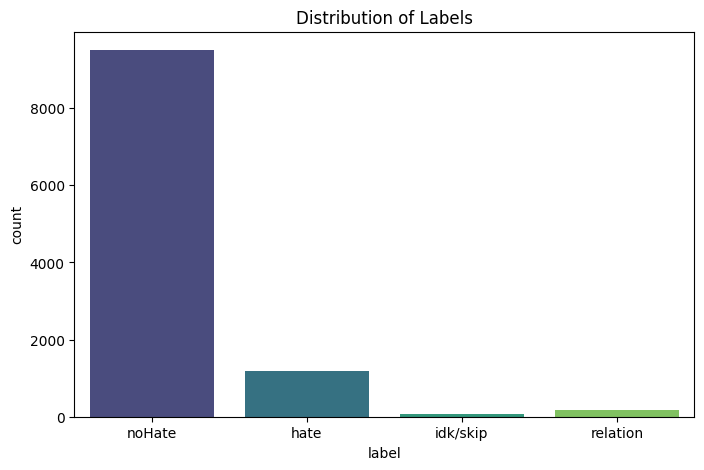

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


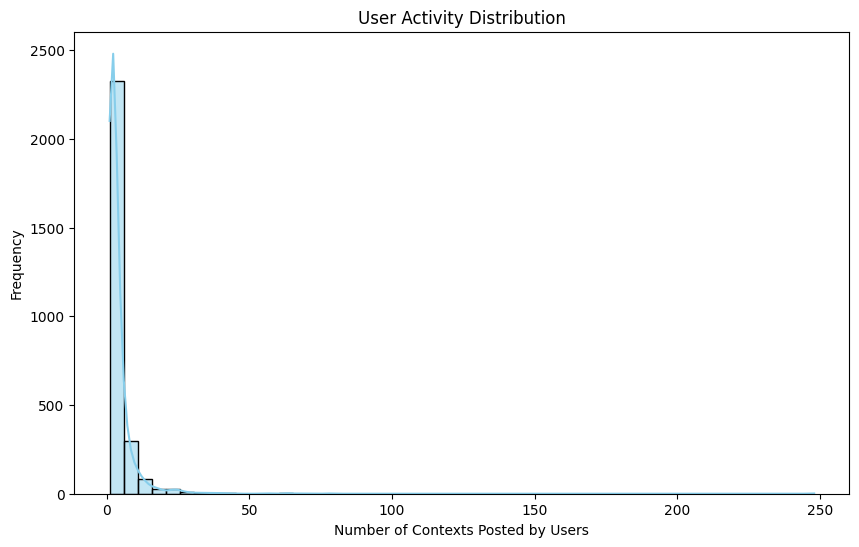

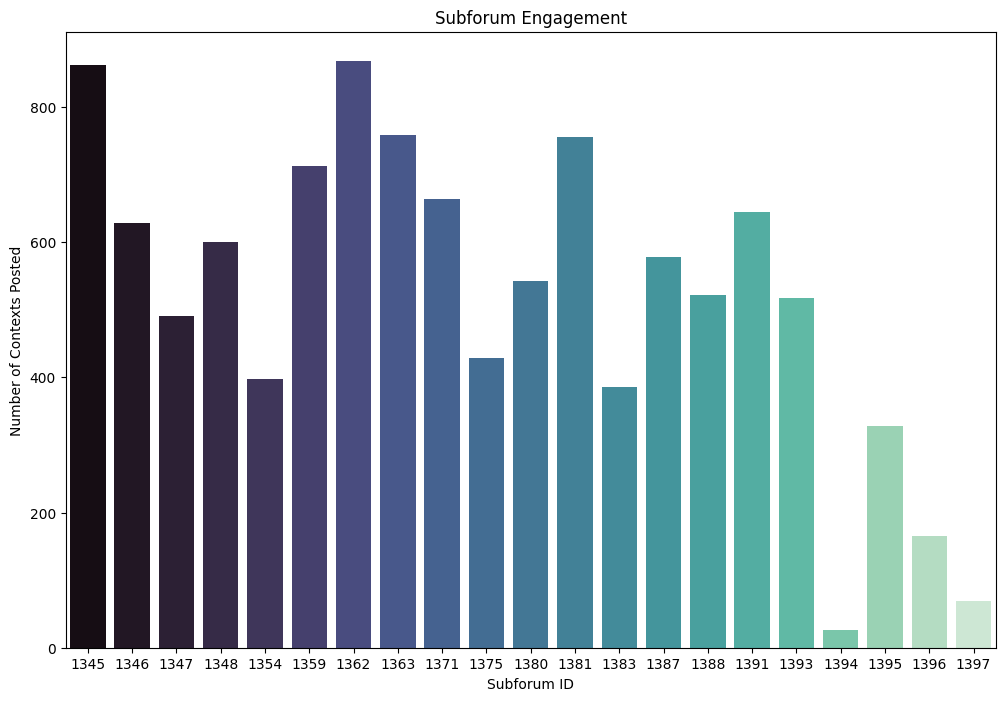

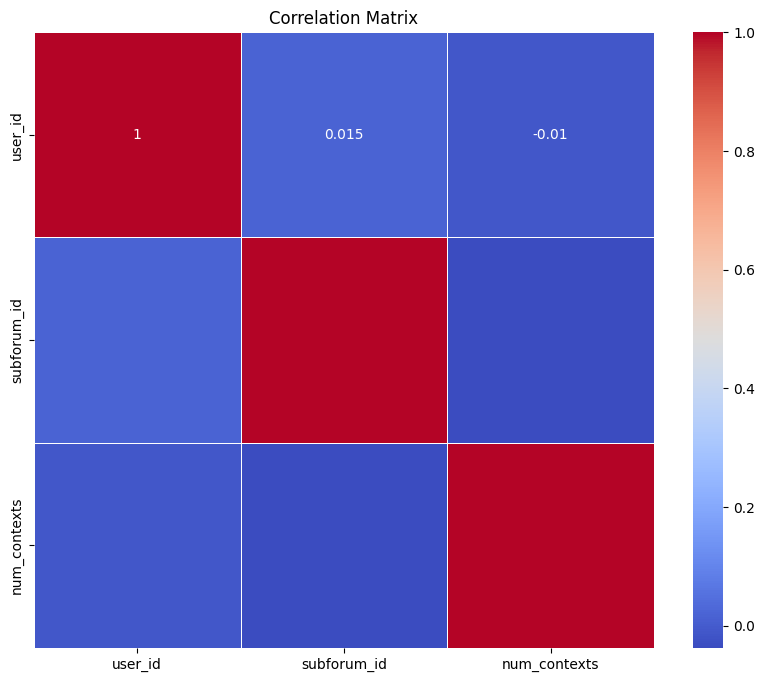

In [10]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Labels
label_counts = df1['label'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=merged_df, palette='viridis')
plt.title('Distribution of Labels')
plt.show()

# User Activity
user_activity = df1.groupby('user_id')['file_id'].count().reset_index()
user_activity.columns = ['user_id', 'activity_count']
plt.figure(figsize=(10, 6))
sns.histplot(user_activity['activity_count'], bins=50, kde=True, color='skyblue')
plt.title('User Activity Distribution')
plt.xlabel('Number of Contexts Posted by Users')
plt.ylabel('Frequency')
plt.show()

# Subforum Engagement
subforum_engagement = df1['subforum_id'].value_counts().reset_index()
subforum_engagement.columns = ['subforum_id', 'engagement_count']
plt.figure(figsize=(12, 8))
sns.barplot(x='subforum_id', y='engagement_count', data=subforum_engagement, palette='mako')
plt.title('Subforum Engagement')
plt.xlabel('Subforum ID')
plt.ylabel('Number of Contexts Posted')
plt.show()

# Drop non-numeric columns before calculating the correlation matrix
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


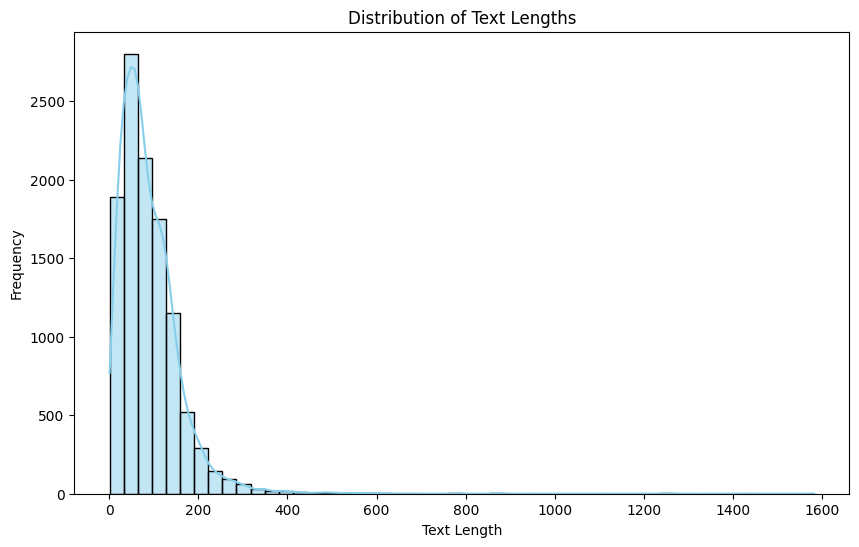

In [11]:
# Analyze the distribution of text lengths
df1['text_length'] = df1['text_content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df1['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

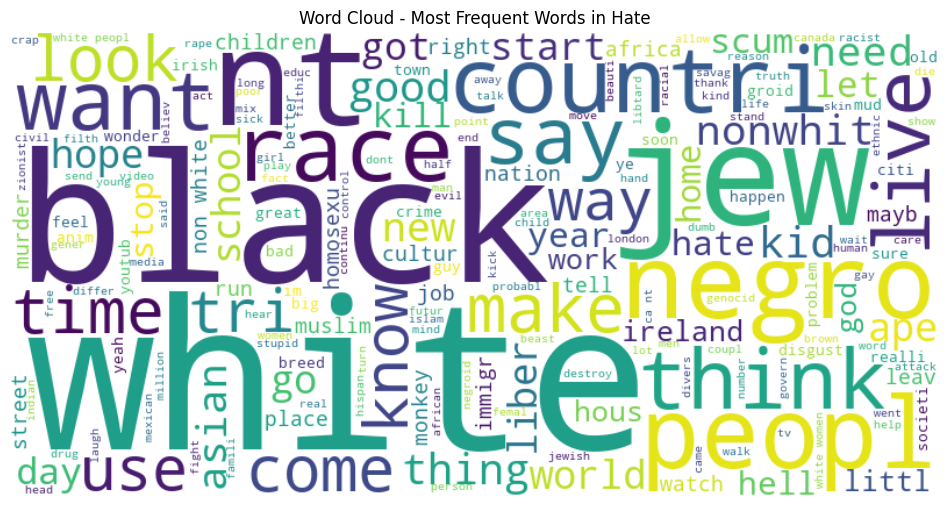

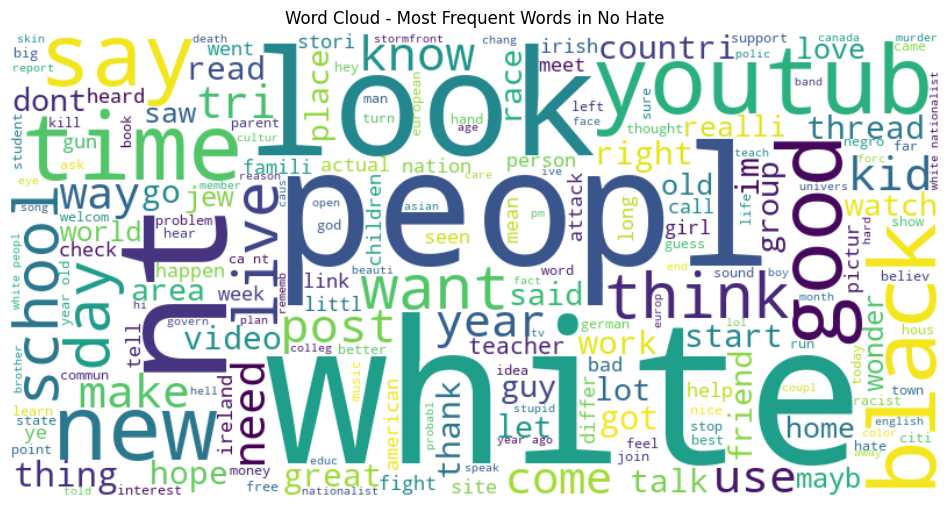

In [26]:
from wordcloud import WordCloud

# Generate a word cloud for 'hate' label
hate_text = ' '.join(df1[df1['label'] == 'hate']['processed_text'])
wordcloud_hate = WordCloud(width=800, height=400, background_color='white').generate(hate_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Hate')
plt.show()

# Generate a word cloud for 'noHate' label
nohate_text = ' '.join(df1[df1['label'] == 'noHate']['processed_text'])
wordcloud_nohate = WordCloud(width=800, height=400, background_color='white').generate(nohate_text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_nohate, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in No Hate')
plt.show()

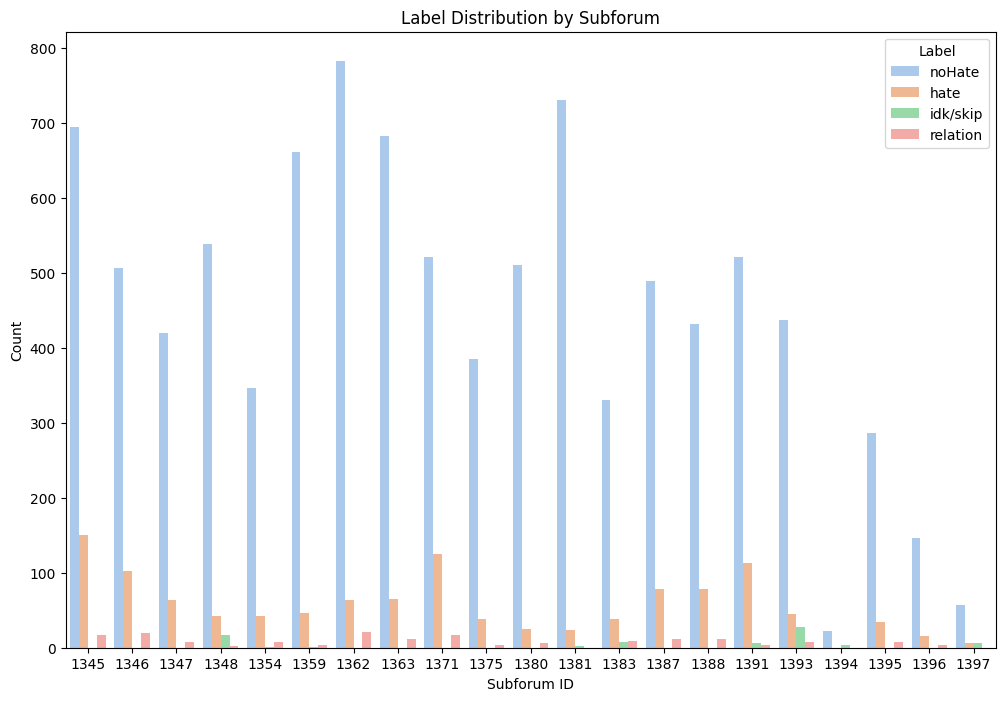

In [13]:
# Analyze label distribution within each subforum
plt.figure(figsize=(12, 8))
sns.countplot(x='subforum_id', hue='label', data=df1, palette='pastel')
plt.title('Label Distribution by Subforum')
plt.xlabel('Subforum ID')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

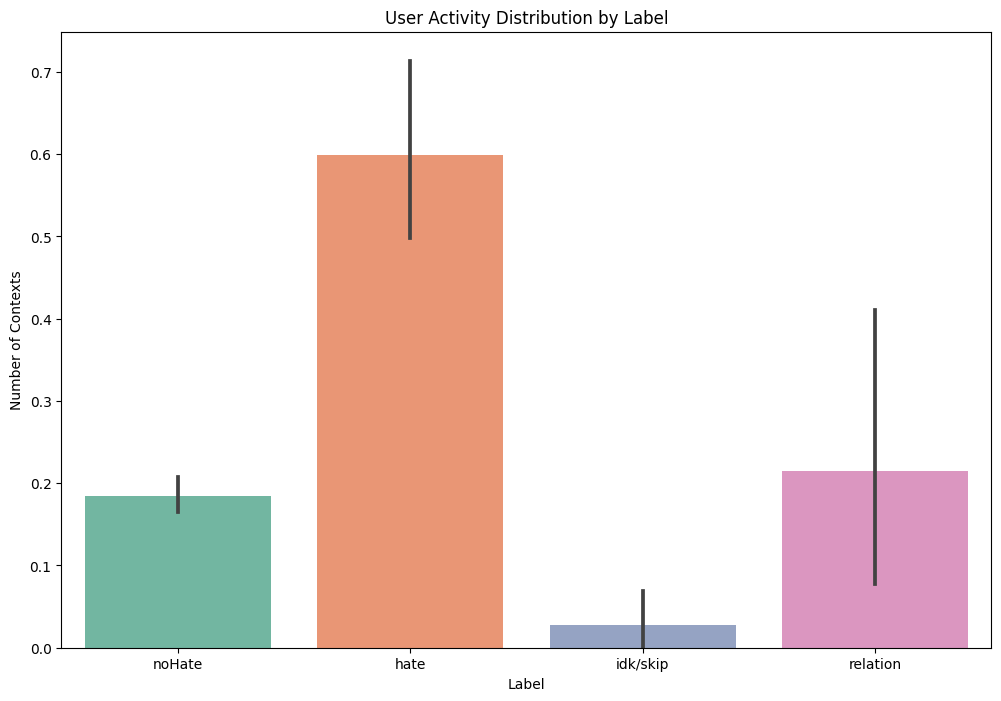

In [14]:
# Analyze user activity distribution by label
plt.figure(figsize=(12, 8))
sns.barplot(x='label', y='num_contexts', data=df1, palette='Set2')
plt.title('User Activity Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Number of Contexts')
plt.show()

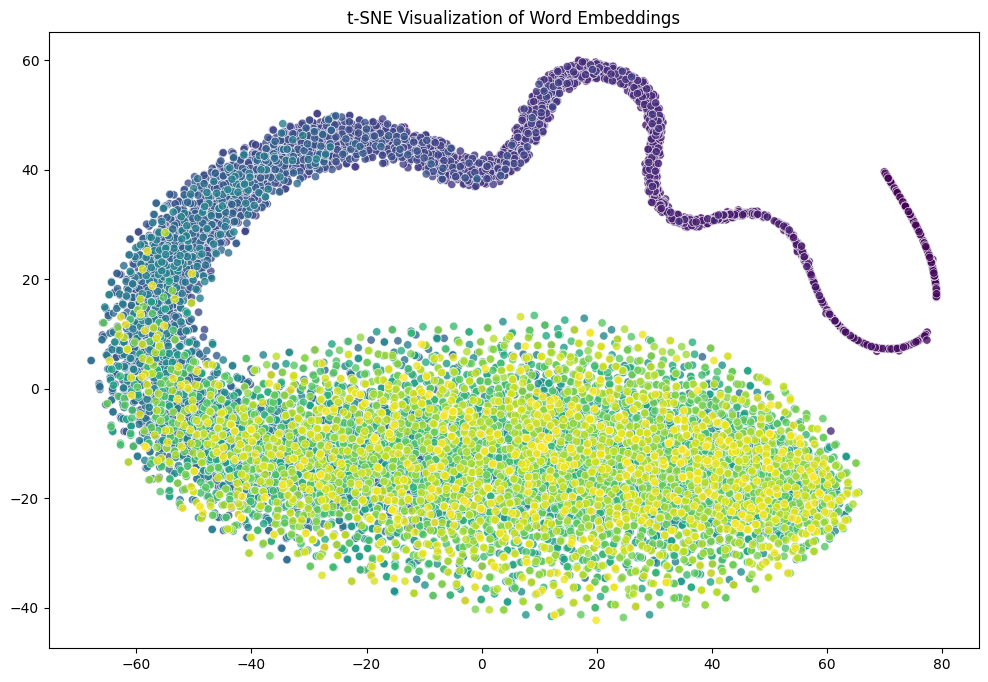

In [15]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np

# Tokenize the processed text into a list of words
tokenized_text = df1['processed_text'].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Convert vectors to a NumPy array
vectors = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key])

# Visualize word embeddings using t-SNE
def plot_tsne(vectors, words):
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=words, palette='viridis', alpha=0.8)
    plt.title('t-SNE Visualization of Word Embeddings')
    plt.legend().remove()
    plt.show()

# Visualize word embeddings
plot_tsne(vectors, word2vec_model.wv.index_to_key)

In [16]:
#Topic Modeling (using Latent Dirichlet Allocation - LDA):
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the processed text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df1['processed_text'])

# Apply Latent Dirichlet Allocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:", end=' ')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display top words for each topic
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

Topic #1: nt, peopl, like, know, need, thing, use, look, hope, say
Topic #2: youtub, eye, black, white, world, mean, new, hair, brown, right
Topic #3: white, black, race, school, old, way, negro, like, year, kid
Topic #4: time, year, jew, ireland, ago, week, got, im, school, ye
Topic #5: good, like, look, post, thank, let, video, watch, kid, news


In [18]:
df1

,file_id,user_id,subforum_id,num_contexts,label,text_content,processed_text,text_length
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been...",march th booklet download time count,90
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...,order help increas booklet download great stor...,209
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...,simpli copi past follow text youtub video desc...,88
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...,click free download color illustr page ebook z...,151
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,click download mb green banner link,59
...,...,...,...,...,...,...,...,...
10939,33676864_5,734541,1388,0,noHate,"Billy - `` That guy would n't leave me alone ,...",billi guy nt leav gave trudeau salut,84
10940,33677019_1,735154,1388,0,noHate,Wish we at least had a Marine Le Pen to vote f...,wish marin le pen vote canada,60
10941,33677019_2,735154,1388,0,noHate,Its like the choices are white genocide candid...,like choic white genocid candid,62
10942,33677053_1,572266,1388,0,hate,Why White people used to say that sex was a si...,white peopl use say sex sin use mysteri saw ch...,160


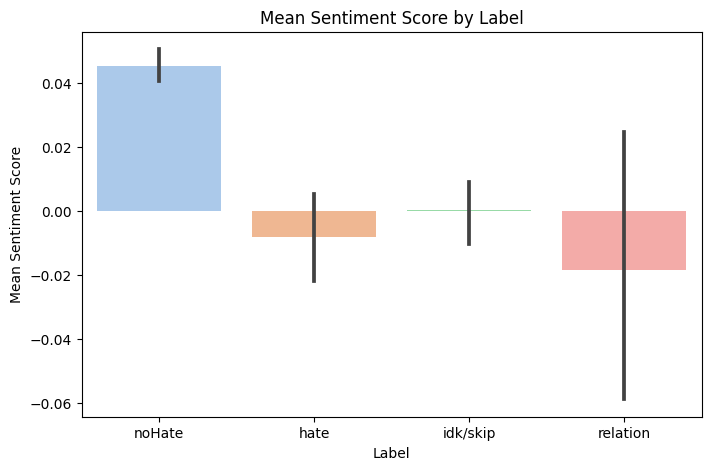

In [19]:
from textblob import TextBlob

# Assuming 'processed_text' is the column containing the processed text
df1['processed_text'] = df1['processed_text'].astype(str)

# Function to calculate sentiment scores using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'processed_text' column and create a new 'sentiment_score' column
df1['sentiment_score'] = df1['processed_text'].apply(calculate_sentiment)

plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='sentiment_score', data=df1, palette='pastel')
plt.title('Mean Sentiment Score by Label')
plt.xlabel('Label')
plt.ylabel('Mean Sentiment Score')
plt.show()

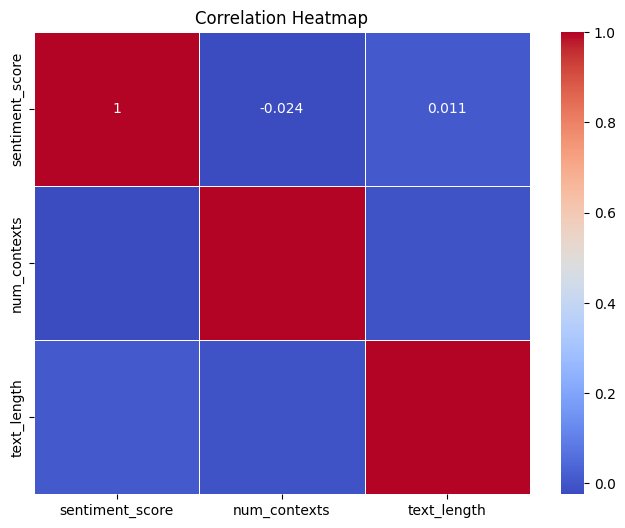

In [20]:
correlation_matrix = df1[['sentiment_score', 'num_contexts', 'text_length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

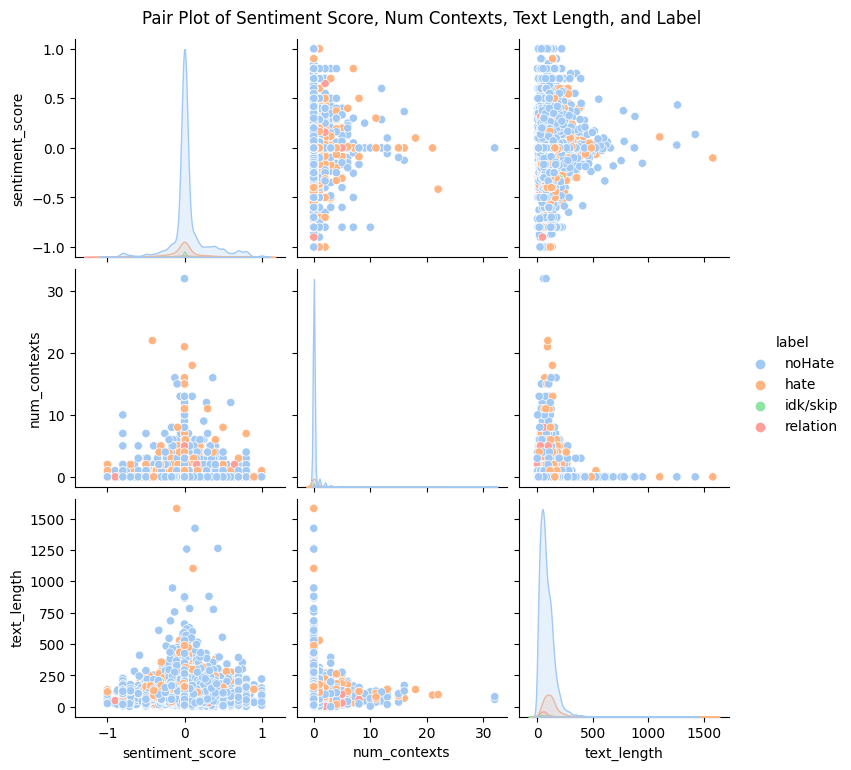

In [21]:
sns.pairplot(df1[['sentiment_score', 'num_contexts', 'text_length', 'label']], hue='label', palette='pastel')
plt.suptitle('Pair Plot of Sentiment Score, Num Contexts, Text Length, and Label', y=1.02)
plt.show()

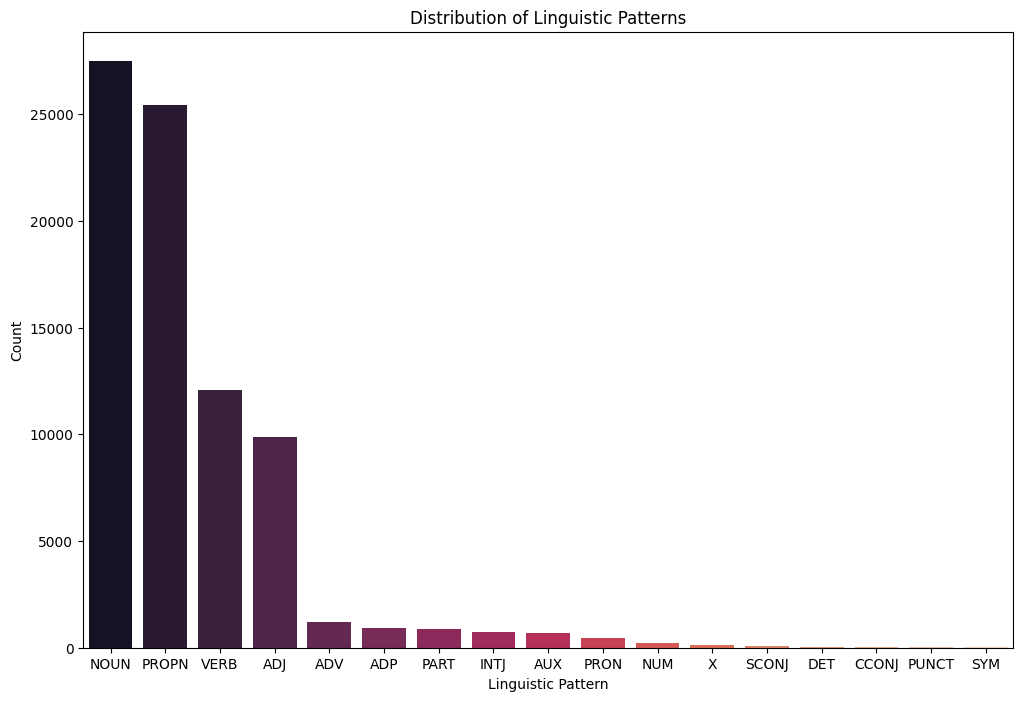

In [22]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to extract linguistic patterns
def extract_linguistic_patterns(text):
    doc = nlp(text)
    patterns = [token.pos_ for token in doc]
    return patterns

# Apply the function to the processed text
df1['linguistic_patterns'] = df1['processed_text'].apply(extract_linguistic_patterns)

# Display the most common linguistic patterns
common_patterns = [item for sublist in df1['linguistic_patterns'] for item in sublist]
plt.figure(figsize=(12, 8))
sns.countplot(x=common_patterns, order=pd.Series(common_patterns).value_counts().index, palette='rocket')
plt.title('Distribution of Linguistic Patterns')
plt.xlabel('Linguistic Pattern')
plt.ylabel('Count')
plt.show()

In [24]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10703 entries, 0 to 10943
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_id              10703 non-null  object 
 1   user_id              10703 non-null  int64  
 2   subforum_id          10703 non-null  int64  
 3   num_contexts         10703 non-null  int64  
 4   label                10703 non-null  object 
 5   text_content         10703 non-null  object 
 6   processed_text       10703 non-null  object 
 7   text_length          10703 non-null  int64  
 8   sentiment_score      10703 non-null  float64
 9   linguistic_patterns  10703 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 919.8+ KB


In [42]:
binary_df.to_csv('binary_df.csv', index=False)

In [23]:
binary_df = df1[df1['label'].isin(['noHate', 'hate'])]

In [27]:
#False Positive/Negative Analysis:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'processed_text' is the processed text column
X = binary_df['processed_text']
y = binary_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a TF-IDF vectorizer and a Random Forest classifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate model performance on the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Model Accuracy: 89.77%
Confusion Matrix:
[[  26  209]
 [  10 1896]]
Classification Report:
              precision    recall  f1-score   support

        hate       0.72      0.11      0.19       235
      noHate       0.90      0.99      0.95      1906

    accuracy                           0.90      2141
   macro avg       0.81      0.55      0.57      2141
weighted avg       0.88      0.90      0.86      2141



In [83]:
from sklearn.svm import SVC

# Create a pipeline with a TF-IDF vectorizer and a Support Vector Machine classifier
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred_svm = svm_model.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(class_report_svm)

SVM Model Accuracy: 90.28%
SVM Confusion Matrix:
[[  45  190]
 [  18 1888]]
SVM Classification Report:
              precision    recall  f1-score   support

        hate       0.71      0.19      0.30       235
      noHate       0.91      0.99      0.95      1906

    accuracy                           0.90      2141
   macro avg       0.81      0.59      0.62      2141
weighted avg       0.89      0.90      0.88      2141



In [84]:
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred_nb = nb_model.predict(X_test)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Model Accuracy: {accuracy_nb * 100:.2f}%")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)

Naive Bayes Model Accuracy: 89.02%
Naive Bayes Confusion Matrix:
[[   0  235]
 [   0 1906]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

        hate       0.00      0.00      0.00       235
      noHate       0.89      1.00      0.94      1906

    accuracy                           0.89      2141
   macro avg       0.45      0.50      0.47      2141
weighted avg       0.79      0.89      0.84      2141



C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a TF-IDF vectorizer and a Logistic Regression classifier
logreg_model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000, random_state=42))

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Model Accuracy: {accuracy_logreg * 100:.2f}%")

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)

# Classification Report
class_report_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:")
print(class_report_logreg)

Logistic Regression Model Accuracy: 89.77%
Logistic Regression Confusion Matrix:
[[  24  211]
 [   8 1898]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        hate       0.75      0.10      0.18       235
      noHate       0.90      1.00      0.95      1906

    accuracy                           0.90      2141
   macro avg       0.82      0.55      0.56      2141
weighted avg       0.88      0.90      0.86      2141



In [86]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with a TF-IDF vectorizer and a Decision Tree classifier
dt_model = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Evaluate model performance on the test set
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt * 100:.2f}%")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(class_report_dt)

Decision Tree Model Accuracy: 87.30%
Decision Tree Confusion Matrix:
[[  83  152]
 [ 120 1786]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

        hate       0.41      0.35      0.38       235
      noHate       0.92      0.94      0.93      1906

    accuracy                           0.87      2141
   macro avg       0.67      0.65      0.65      2141
weighted avg       0.87      0.87      0.87      2141



In [71]:
#use a recurrent neural network (RNN) or a long short-term memory (LSTM) network for sequential 
#data like text. Below is an example using an LSTM-based neural network with Keras:


In [77]:
binary_df['encoded_label'] = binary_df['label'].map({'noHate': 1, 'hate': 0})

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_10660\2149297291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df['encoded_label'] = binary_df['label'].map({'noHate': 1, 'hate': 0})


In [81]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'processed_text' is the processed text column
X = binary_df['processed_text']
y = binary_df['encoded_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # You can adjust this based on your dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate model performance on the test set
y_pred_prob_lstm = model.predict(X_test_pad)

# Convert probabilities to binary predictions (0 or 1)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

# Flatten the predictions to 1D array
y_pred_lstm = y_pred_lstm.flatten()

# Convert the predictions to binary labels
y_pred_lstm_labels = ['hate_speech' if pred == 0 else 'noHate' for pred in y_pred_lstm]

# Ensure that y_test is consistent with the label format
y_test_labels = ['hate_speech' if label == 0 else 'noHate' for label in y_test]

# Evaluate model performance
accuracy_lstm = accuracy_score(y_test_labels, y_pred_lstm_labels)
print(f"LSTM Model Accuracy: {accuracy_lstm * 100:.2f}%")

# Confusion Matrix
conf_matrix_lstm = confusion_matrix(y_test_labels, y_pred_lstm_labels, labels=['hate_speech', 'noHate'])
print("LSTM Confusion Matrix:")
print(conf_matrix_lstm)

# Classification Report
class_report_lstm = classification_report(y_test_labels, y_pred_lstm_labels)
print("LSTM Classification Report:")
print(class_report_lstm)

Epoch 1/5
268/268 [==============================] - 21s 65ms/step - loss: 0.3627 - accuracy: 0.8878 - val_loss: 0.3460 - val_accuracy: 0.8902
Epoch 2/5
268/268 [==============================] - 17s 65ms/step - loss: 0.3519 - accuracy: 0.8878 - val_loss: 0.3472 - val_accuracy: 0.8902
Epoch 3/5
268/268 [==============================] - 17s 65ms/step - loss: 0.3516 - accuracy: 0.8879 - val_loss: 0.3464 - val_accuracy: 0.8902
Epoch 4/5
268/268 [==============================] - 17s 65ms/step - loss: 0.3517 - accuracy: 0.8879 - val_loss: 0.3464 - val_accuracy: 0.8902
Epoch 5/5
67/67 [==============================] - 1s 13ms/step
LSTM Model Accuracy: 89.02%
LSTM Confusion Matrix:
[[   0  235]
 [   0 1906]]
LSTM Classification Report:
              precision    recall  f1-score   support

 hate_speech       0.00      0.00      0.00       235
      noHate       0.89      1.00      0.94      1906

    accuracy                           0.89      2141
   macro avg       0.45      0.50      0

C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
